In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from skimage import io

In [30]:
url = 'https://engineering.nyu.edu/sites/default/files/styles/content_header_620_2x/public/2018-04/brooklyn-bridge-a.jpg'

In [31]:
img = io.imread(url)

In [32]:
print(img)

[[[ 82 149 227]
  [ 82 149 227]
  [ 82 149 227]
  ...
  [112 188 238]
  [112 188 238]
  [112 188 238]]

 [[ 83 150 228]
  [ 83 150 228]
  [ 83 150 228]
  ...
  [114 190 240]
  [114 190 240]
  [114 190 240]]

 [[ 84 151 229]
  [ 84 151 229]
  [ 84 151 229]
  ...
  [116 192 242]
  [116 192 242]
  [116 192 242]]

 ...

 [[193 141 127]
  [193 130 115]
  [190 102  88]
  ...
  [206 129  99]
  [208 129  98]
  [209 130  99]]

 [[180 143 125]
  [192 141 124]
  [202 123 108]
  ...
  [205 130  99]
  [206 130  98]
  [207 131  99]]

 [[166 137 119]
  [185 142 125]
  [207 131 117]
  ...
  [204 131  99]
  [206 130  98]
  [207 131  99]]]


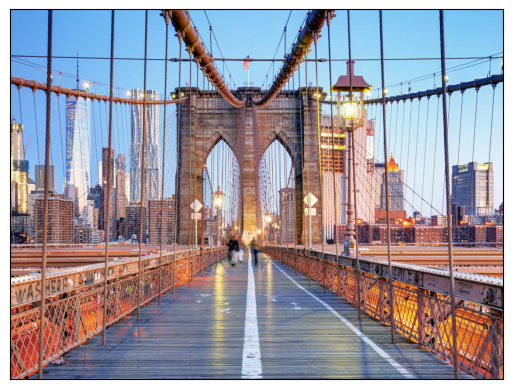

In [33]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
print(img.shape)

(1404, 1872, 3)


In [35]:
img[:, :, 0]

array([[ 82,  82,  82, ..., 112, 112, 112],
       [ 83,  83,  83, ..., 114, 114, 114],
       [ 84,  84,  84, ..., 116, 116, 116],
       ...,
       [193, 193, 190, ..., 206, 208, 209],
       [180, 192, 202, ..., 205, 206, 207],
       [166, 185, 207, ..., 204, 206, 207]],
      shape=(1404, 1872), dtype=uint8)

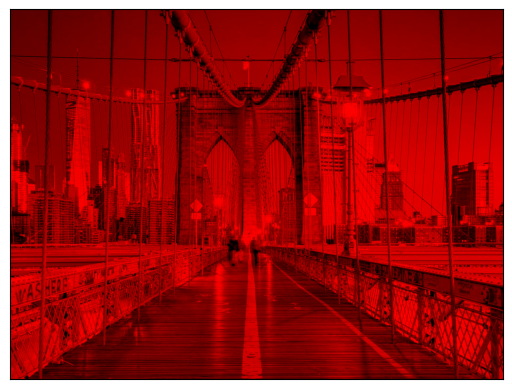

In [36]:
img_red = img.copy()
img_red[:, :, 1] = np.zeros(img.shape[:2])
img_red[:, : , 2] = np.zeros(img.shape[:2])

plt.imshow(img_red)
plt.xticks([])
plt.yticks([])
plt.show()

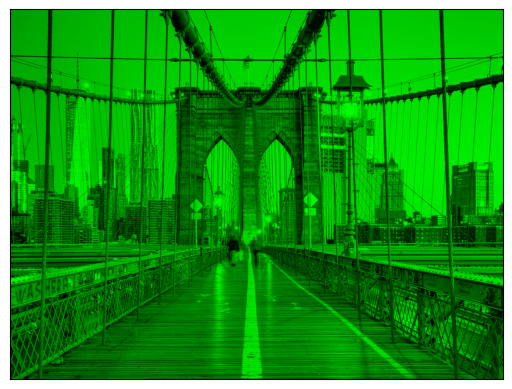

In [37]:
img_green = img.copy()
img_green[:, :, 0] = np.zeros(img.shape[:2])
img_green[:, : , 2] = np.zeros(img.shape[:2])

plt.imshow(img_green)
plt.xticks([])
plt.yticks([])
plt.show()

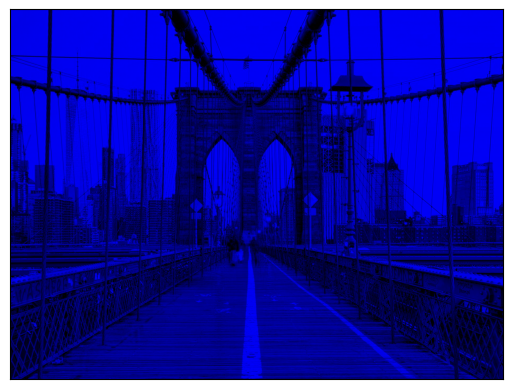

In [38]:
img_blue = img.copy()
img_blue[:, :, 0] = np.zeros(img.shape[:2])
img_blue[:, : , 1] = np.zeros(img.shape[:2])

plt.imshow(img_blue)
plt.xticks([])
plt.yticks([])
plt.show()

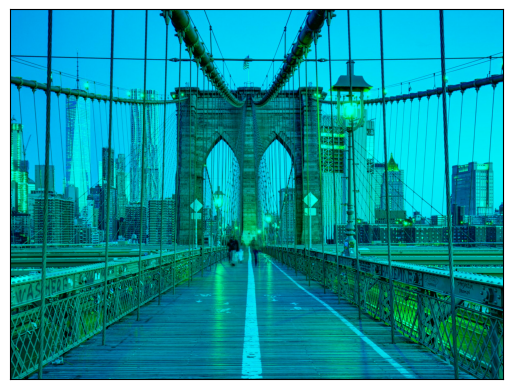

In [39]:
new_img = img_blue + img_green
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.show()

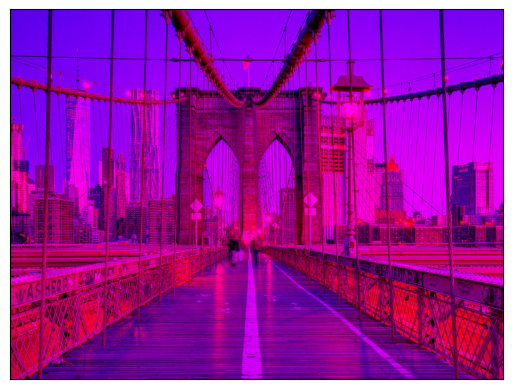

In [40]:
new_img = img_blue + img_red
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.show()

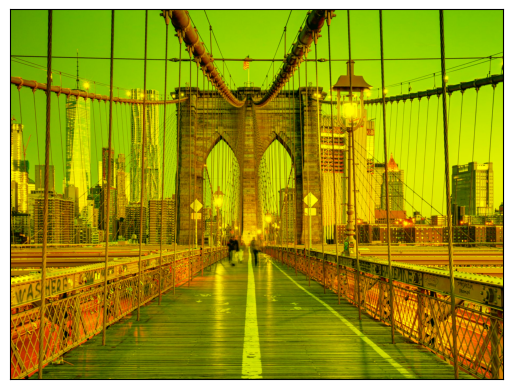

In [41]:
new_img = img_green + img_red
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.show()

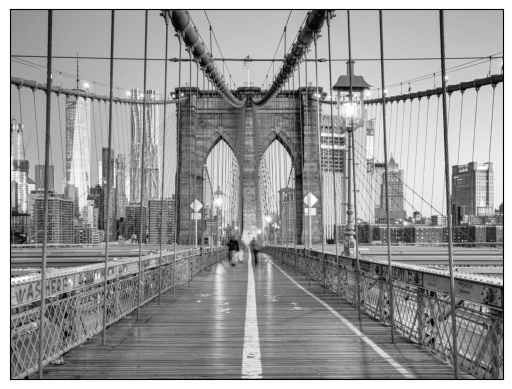

In [42]:
# Grayscale Value = 0.299 * Red + 0.587 * Green + 0.114 * Blue
img_grayscale = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
plt.imshow(img_grayscale, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [43]:
Fx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

In [44]:
from scipy.signal import correlate2d

In [45]:
output_img = correlate2d(img_grayscale, Fx, mode='valid')

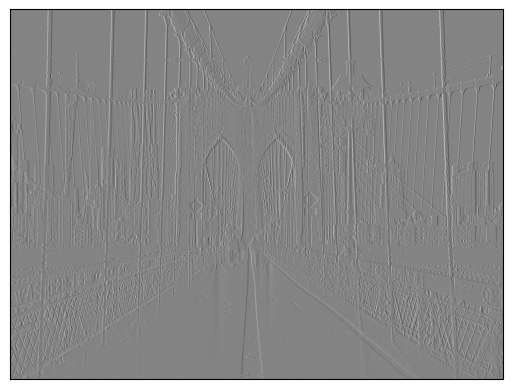

In [46]:
plt.imshow(output_img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [47]:
print(output_img.shape)

(1402, 1870)


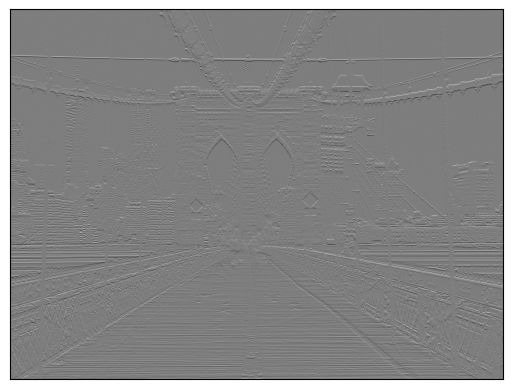

In [48]:
Fy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

output_img_2 = correlate2d(img_grayscale, Fy, mode='valid')

plt.imshow(output_img_2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [49]:
def gauss_kernel(nx, ny, sig):
    """
    Creates a Gaussian kernel of size (nx,ny) with std deviation sig
    """
    dxsq = (np.arange(nx)-(nx-1)/2)**2
    dysq = (np.arange(ny)-(ny-1)/2)**2
    dsq = dxsq[:,None] + dysq[None,:]
    G = np.exp(-0.5*dsq/(sig**2))
    G = G / np.sum(G)
    return G

In [50]:
F_gauss = gauss_kernel(9, 9, 3)

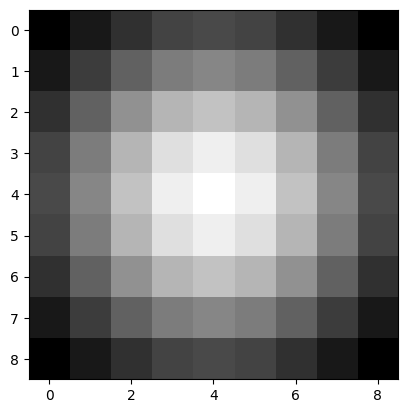

In [51]:
plt.imshow(F_gauss, cmap='gray')

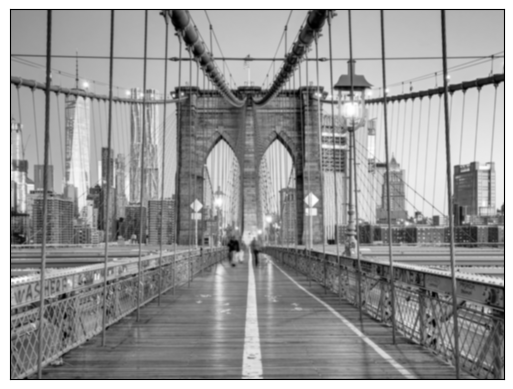

In [52]:
output_img_3 = correlate2d(img_grayscale, F_gauss, mode='valid')

plt.imshow(output_img_3, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()